In [1]:
%pip install --upgrade --user xarray matplotlib numpy scipy pandas pyarrow

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------- 165.9/165.9 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.2 MB 10.6 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.0 MB 13.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.0 MB 11.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 11.6 MB/s eta 0:00:01
   ---------- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import square, sawtooth, chirp

# Signals and plotting with Numpy and Matplotlib

### Overview

Signal analysis is key to uncovering patterns in time series data like EEG or LFP recordings. And to get a better understanding of the signals we are working with, it's important to visualize them clearly. Here, we will work with different generated signals and make figures that display those signals in a way that makes the plots easy to read.

#### Learning Goals

In this notebook, we will focus on generating various types of signals using Python's [**Numpy**](https://numpy.org/) and [**Scipy**](https://docs.scipy.org/) packages as well as Python's built-in functions and plot them with [**Matplotlib**](https://matplotlib.org/).

---

## Generating Periodic Signals

Periodic waveforms play a vital role in neuroscience as models for rhythmic stimuli and neural oscillations. By generating such waveforms we can, for instance, simulate neural activity that exhibit periodic behavior in response to visual stimuli, such as flashing lights or gradual intensity changes.

This section provides a hands-on introduction to creating and visualizing periodic waveforms using the `scipy.signal` module. Through a series of exercises, we'll explore the characteristics of square and sawtooth waves at various frequencies. We will also explore generating chirp using the `chirp` method (a chirp is a signal in which the frequency increases ('up-chirp') or decreases ('down-chirp') with time). We will use the same `chirp` method to create cosine waves too!


| Code                             | Description                                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| `np.pi`                          | The mathematical constant π, approximately 3.14159.                                           |
| `np.linspace(start, stop, n)`    | Generates an array of `n` evenly spaced values from `start` to `stop`.                        |
| `square(2 * np.pi * f * t)`      | Generates a square wave with frequency `f` over time array `t`.                               |
| `sawtooth(2 * np.pi * f * t)`    | Produces a sawtooth wave with frequency `f` over time array `t`.                              |
| `plt.plot(x, y)`                 | Plots the data in `y` against the corresponding values in `x`.                                |


**Example** Create a 1 Hz square wave sampled 100 times for 1 second.

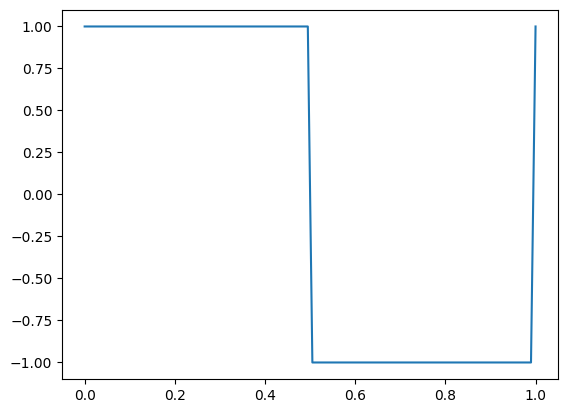

In [2]:
f = 1 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

This is a square wave of 1 Hz frequency. A frequency of `n` Hz means that the pattern you see above repeats `n` times in a second. Let's see that happen in the following exercises.

Create a 2 Hz square wave sampled 100 times for 1 second. How many repetitions of the pattern do you see here?

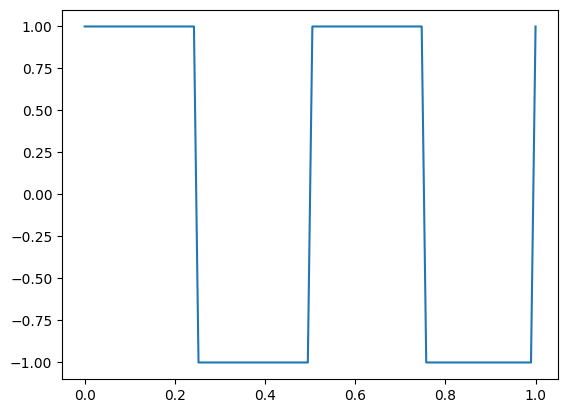

In [3]:
f = 2 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

Create a 10 Hz square wave sampled 100 times for 1 second.

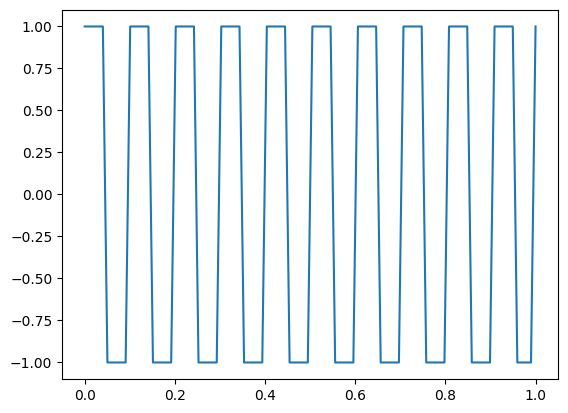

In [4]:
f = 10 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

Using the `sawtooth` function, create a 5 Hz sawtooth signal sampled 100 times for 1 second.

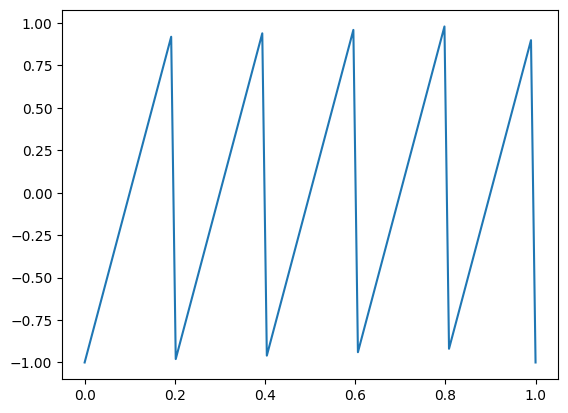

In [5]:
f = 5 # Hz
t = np.linspace(0, 1, 100)
w = sawtooth(2 * np.pi * f * t)
plt.plot(t, w)

Numpy arrays are built for mathematical operations. For example, we can re-generate the signal we created before with double the magnitude simply by multiplying the signal `w` by $2$:

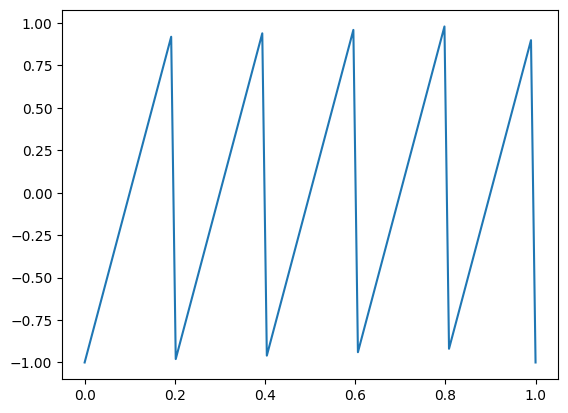

In [6]:
f = 5 # Hz
t = np.linspace(0, 1, 100)
w = sawtooth(2 * np.pi * f * t)
w_double_magnitude = 2 * w
plt.plot(t, w)

Numpy package also provides many useful functions that we can use to transform our data. For instance `np.exp()` or `np.log()`.

Write the code for $z = \exp(t) \cdot w$, where $w$ is the sawtooth waveform and $t$ is time. Plot the resulting $z$ over time.

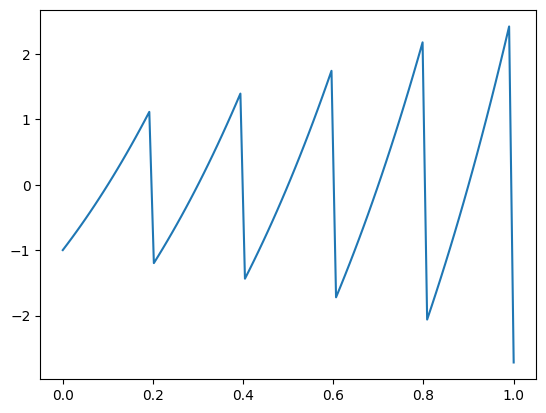

In [7]:
f = 5 # Hz
t = np.linspace(0, 1, 100)
w = np.exp(t) * sawtooth(2 * np.pi * f * t)
plt.plot(t, w)

### Chirp Signal

A chirp is a signal in which the frequency increases or decreases over time. In the context of the `scipy.signal.chirp` function, the signal starts at frequency `f0` and linearly changes to frequency `f1` by time `t1`. The rate of this frequency change can follow different methods; when the 'linear' method is used, the frequency changes at a constant rate.

Here is a summary table for the examples of chirp signals:

| Example               | Start Frequency (`f0`) | End Frequency (`f1`) | Time (`t1`) | Frequency Change        | Description                       |
|-----------------------|------------------------|----------------------|-------------|-------------------------|-----------------------------------|
| Constant Frequency    | 5 Hz                   | 5 Hz                 | 10 s        | None (Constant)         | A sine wave with a constant frequency. |
| Increasing Frequency  | 5 Hz                   | 10 Hz                | 10 s        | Linear Increase         | A sine wave that linearly increases in frequency over time. |
| Decreasing Frequency  | 10 Hz                  | 5 Hz                 | 10 s        | Linear Decrease         | A sine wave that linearly decreases in frequency over time. |

**Example** Generate constant frequency (1Hz) signal with `chirp`

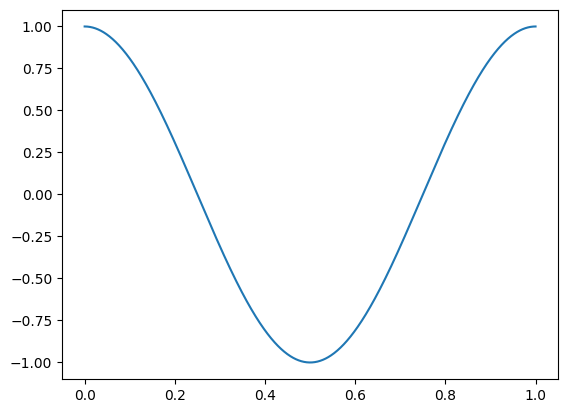

In [8]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=1, f1=1, t1=1)
plt.plot(t, w)

Generate a chirp signal that starts at a frequency of 1 Hz and increases to 10 Hz over a duration of 1 second.

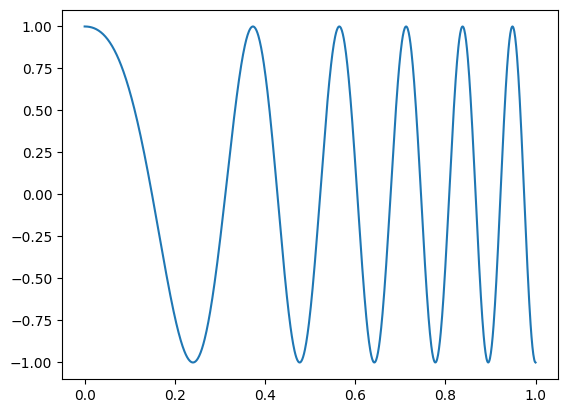

In [9]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=1, f1=10, t1=1)
plt.plot(t, w)

Generate the same chirp signal as in the last exercise but with a decreasing frequency.

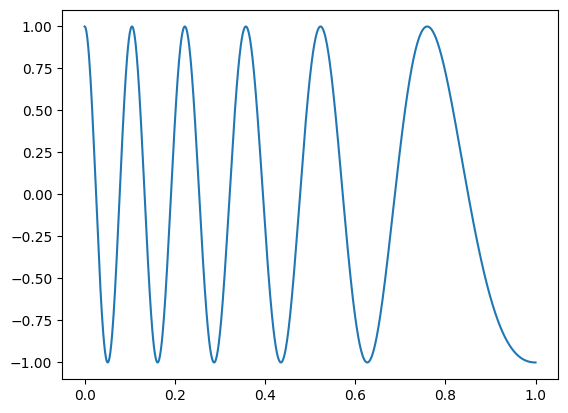

In [10]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=10, f1=1, t1=1)
plt.plot(t, w)

What other options are available in the `chirp` function to control the change of frequency over time? Look up the available `methods` that you can use in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html) for the `chirp` function. Make different chirp signals using the different methods and plot all signals together in one plot.

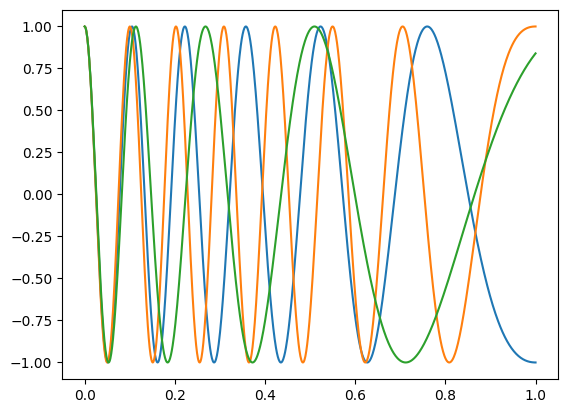

In [11]:
t = np.linspace(0, 1, 1000)

w = chirp(t, f0=10, f1=1, t1=1)
plt.plot(t, w)

w = chirp(t, f0=10, f1=1, t1=1, method="quadratic")
plt.plot(t, w)

w = chirp(t, f0=10, f1=1, t1=1, method="logarithmic")
plt.plot(t, w)

Let's label each line plot so it's clear which line comes from which method. We can do this by:
1. setting the `label` argument of the `plt.plot()` function.
2. calling `plt.legend()` at the end to make the legend appear in the plot.

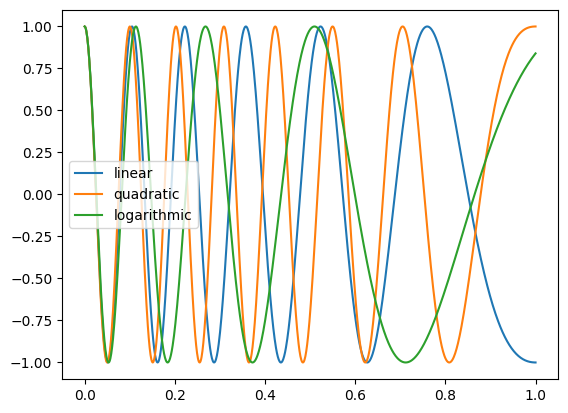

In [12]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=10, f1=1, t1=1)
plt.plot(t, w, label="linear")
w = chirp(t, f0=10, f1=1, t1=1, method="quadratic")
plt.plot(t, w, label="quadratic")
w = chirp(t, f0=10, f1=1, t1=1, method="logarithmic")
plt.plot(t, w, label="logarithmic")

plt.legend()

As a final step let's make the figure wider so we can see the difference between the lines a bit more clearly. 

This is a figure-level property that we want to change. We can specify figure-level properties using the function `plt.figure()` which will be placed in the very beginning of the visualization code.

Here, we want to change the figure size which we can do by setting the `figsize` argument: `plt.figure(figsize=(15, 3))`. The first value specifies the width, and the second value specified the height. Let's try it!

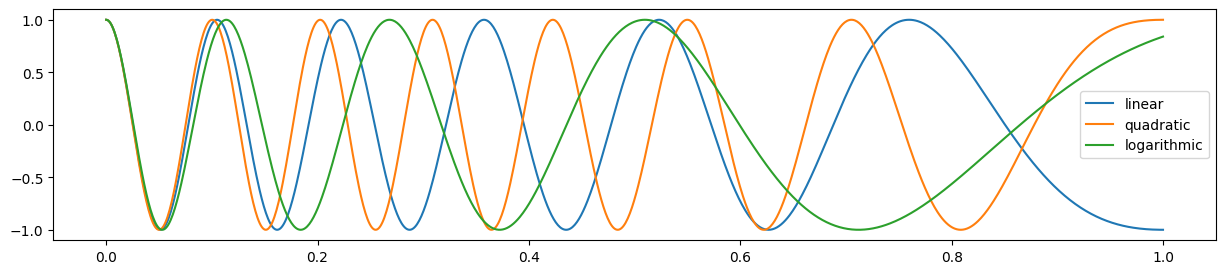

In [13]:
plt.figure(figsize=(15, 3))

t = np.linspace(0, 1, 1000)

w = chirp(t, f0=10, f1=1, t1=1)
plt.plot(t, w, label="linear")

w = chirp(t, f0=10, f1=1, t1=1, method="quadratic")
plt.plot(t, w, label="quadratic")

w = chirp(t, f0=10, f1=1, t1=1, method="logarithmic")
plt.plot(t, w, label="logarithmic")

plt.legend()

---

## Create Composite Signals

In this section, we will learn about combining multiple periodic signals together, creating more complex signals.

We will make use of matplotlib and how powerful it is in customizing plots


| Code | Description |
| ---- | ----------- |
| `np.linspace(start, stop, n_points)` | Create `n_points` equally spaced values between `start` and `stop`. |
| `plt.plot(x, y)` | Plot `x` on the x-axis and `y` on the y-axis. |
| `plt.xlabel('X-axis')` | Set the x-axis label as 'X-axis'. |
| `plt.ylabel('Y-axis')` | Set the y-axis label as 'Y-axis'. |
| `np.random.randn(n_points)` | Generate `n_points` random values drawn from a standard normal distribution. |

**Example** Create a composite wave from two square waves

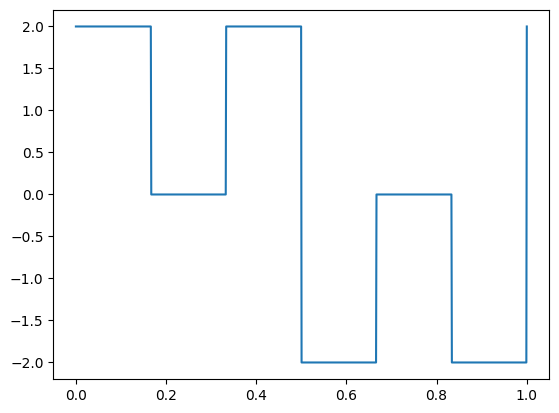

In [14]:
f1 = 1
f2 = 3
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = square(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

Create composite wave made of a 10-Hz sawtooth and a 1-Hz square wave

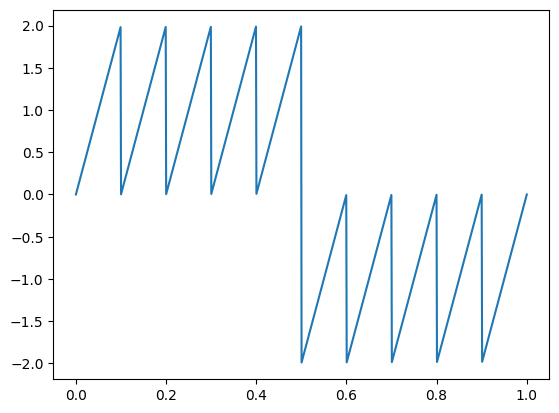

In [15]:
f1 = 1.
f2 = 10.
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

**Example** Create a composite signal made of two chirps and add axis labels and title with legend

Text(0.5, 1.0, 'Composite signal of two chirps')

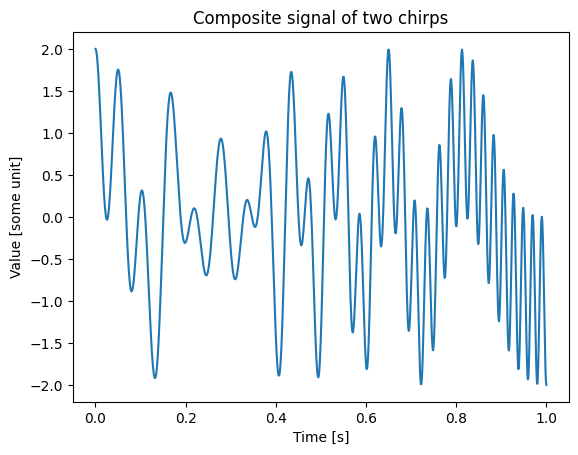

In [16]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)

plt.plot(t, w1+w2)

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Let's learn a bit more about matplotlib and optimize this figure further.

We already specified some "axes-level" properties in the last exercise. In the following exercises, Let's change both "figure-level" properties as well the the arguments in the plotting function to improve our plot.

Let's start by making the figure a bit wider as we did before.

In [17]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)

w = w1 + w2

Text(0.5, 1.0, 'Composite signal of two chirps')

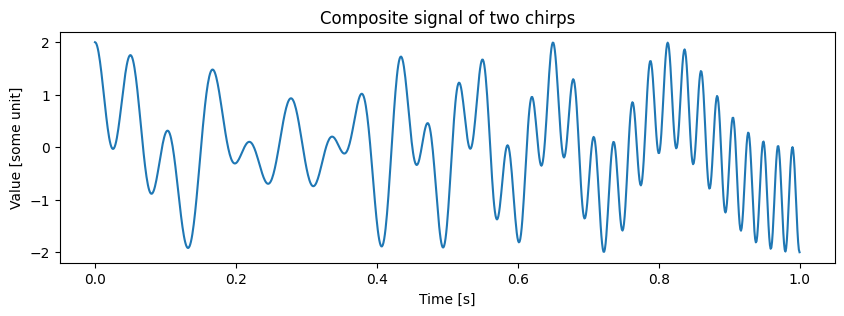

In [18]:
plt.figure(figsize=(10, 3))

plt.plot(t, w)

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Make the line a bit thicker by setting the `linewidth` argument in the `plt.plot()` function.

Text(0.5, 1.0, 'Composite signal of two chirps')

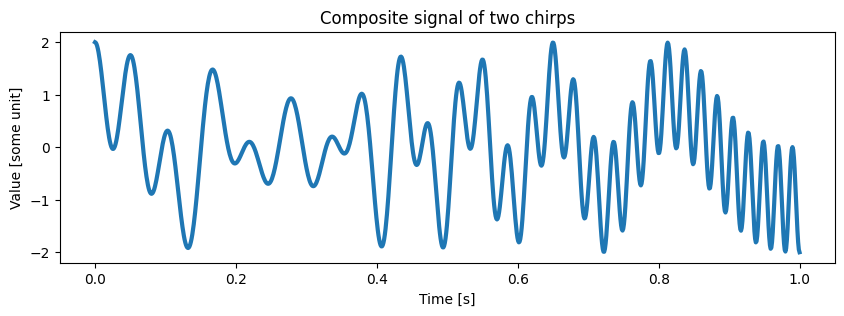

In [19]:
plt.figure(figsize=(10, 3))

plt.plot(t, w, linewidth=3)

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Change the color to black by setting the `color` argument.

Text(0.5, 1.0, 'Composite signal of two chirps')

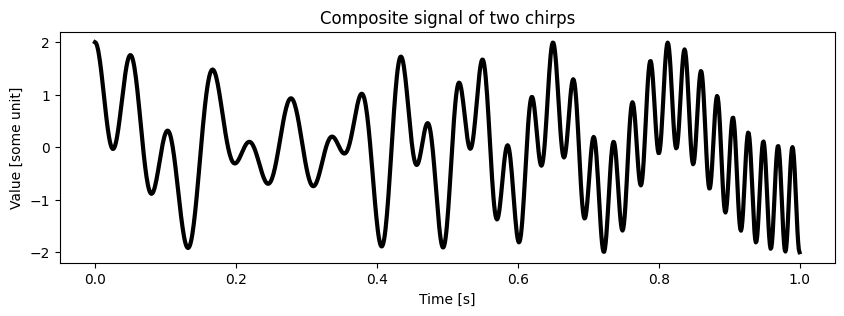

In [20]:
plt.figure(figsize=(10, 3))

plt.plot(t, w, linewidth=3, color="k")

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Make the resolution higher by setting the "figure-level" property `dpi`. Let's try a dpi of 200 for instance.

Text(0.5, 1.0, 'Composite signal of two chirps')

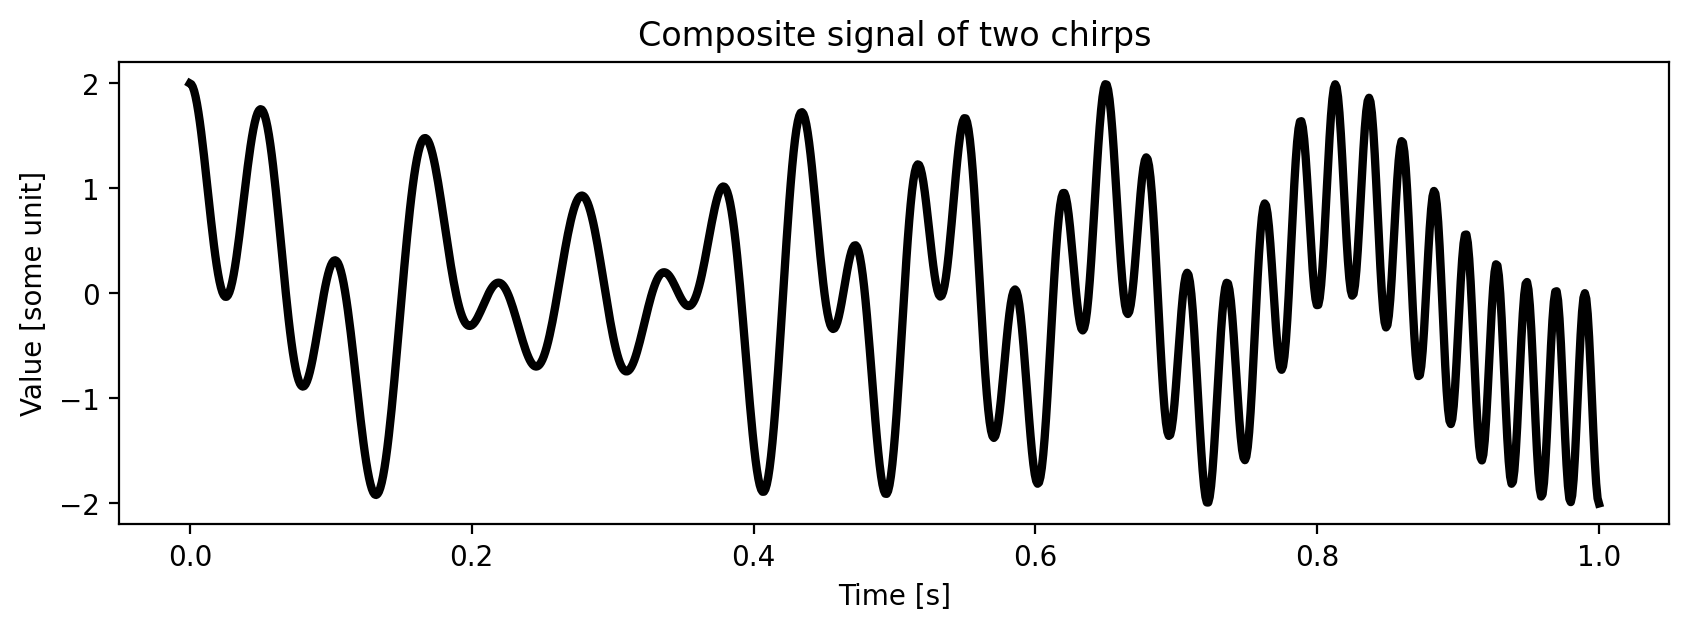

In [21]:
plt.figure(figsize=(10, 3), dpi=200)

plt.plot(t, w, linewidth=3, color="k")

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

You can play around with the `figsize` and `dpi` to adjust the fontsize in the figure. For instance, a higher `dpi` combined with a lower `figsize` results in bigger fontsize. 

Text(0.5, 1.0, 'Composite signal of two chirps')

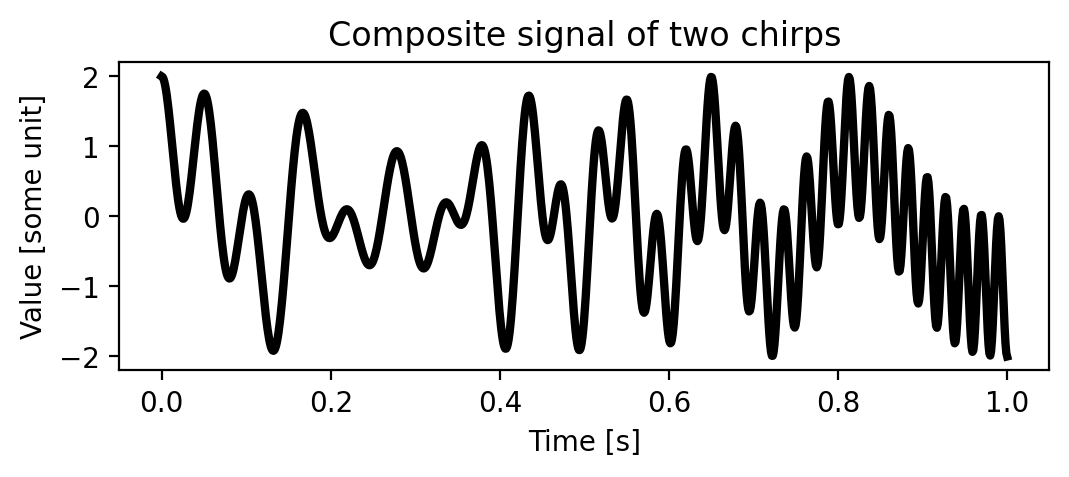

In [22]:
plt.figure(figsize=(6, 2), dpi=200)

plt.plot(t, w, linewidth=3, color="k")

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

### Plotting multiple signals together in the same figure with subplots

| Code                                    | Description                                            |
| --------------------------------------- | ------------------------------------------------------ |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.subplot(nrows, ncols, nindex)` | `plt.subplot(211)` tells Python to create a grid of subplots with 2 rows and 1 column and to use the first subplot (top plot) for the current plotting commands. If you were to add another plotting command with plt.subplot(212), it would plot in the second subplot (bottom plot). |
| `plt.tight_layout()` | Adjust the padding between and around subplots. |
| `plt.savefig(filename)` | Save the figure as an image or vector graphic file. |
| `fig, axes = plt.subplots(nrows, ncols, sharex = True)` | Another method to create figure with subplots (notice the `s` at the end of `subplots` here, that makes it a different function). `axes` can be indexed to refer to a specific subplot, f.ex. the subplot on the first row and second column would be `axes[0,1]`. Setting `sharex` or `sharey` to be `True` forces the x- or y-axis, respectively, to be the same across different subplots. |


**Example:** Make a figure with subplots where the composite signal is plotted in the third subplot and two original signals `w1` and `w2` are plotted in the first and second subplot, respectively.

Text(0, 0.5, 'Value [some unit]')

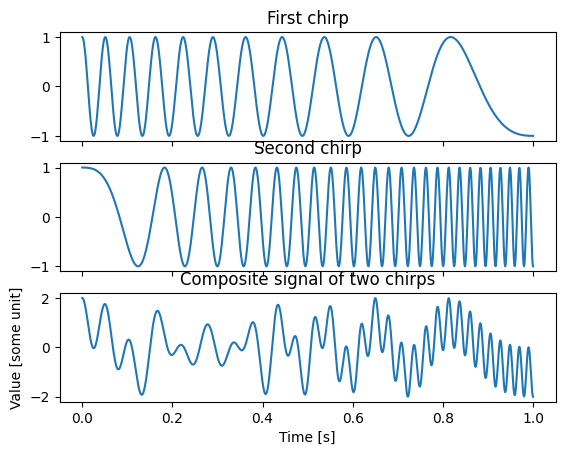

In [34]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)

plt.subplot(311)
plt.plot(t, w1)

plt.title('First chirp')

plt.subplot(312)
plt.plot(t, w2)

plt.title('Second chirp')

plt.subplot(313)
plt.plot(t, w1+w2)

plt.title('Composite signal of two chirps')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')

**Example**: As you can see, the different subplots partly cover one another, which is not good. Adding ``plt.tight_layout`` to the code adjusts the padding around the subplots so that they don't overlap.

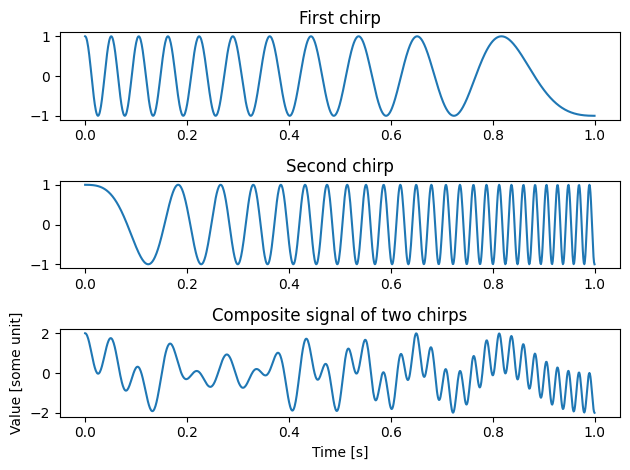

In [40]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)

plt.subplot(311)
plt.plot(t, w1)

plt.title('First chirp')

plt.subplot(312)
plt.plot(t, w2)

plt.title('Second chirp')

plt.subplot(313)
plt.plot(t, w1+w2)

plt.title('Composite signal of two chirps')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')

plt.tight_layout()

**Exercise**: Make a figure with 4 subplots where subplots 1 to 3 show three different composite signals and the 4th subplot shows the composite signal.

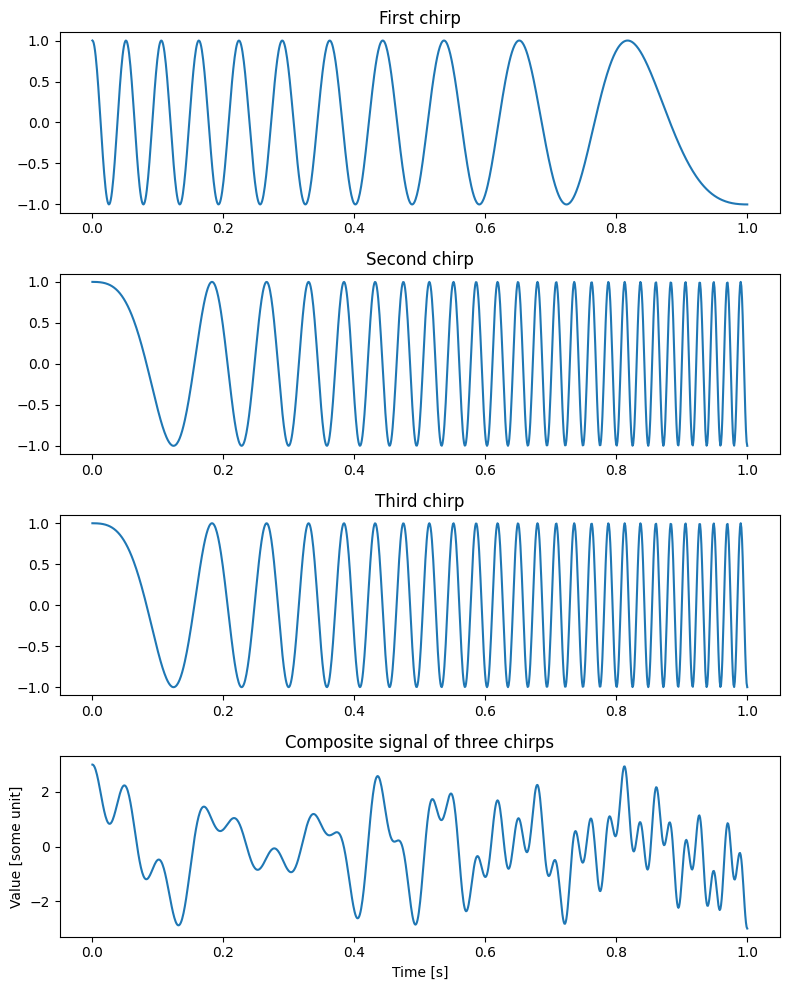

In [45]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)
w3 = chirp(t, f0=3, f1=20, t1=1)

plt.figure(figsize = (8,10))

plt.subplot(411)
plt.plot(t, w1)

plt.title('First chirp')

plt.subplot(412)
plt.plot(t, w2)

plt.title('Second chirp')

plt.subplot(413)
plt.plot(t, w2)

plt.title('Third chirp')

plt.subplot(414)
plt.plot(t, w1+w2+w3)

plt.title('Composite signal of three chirps')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')

plt.tight_layout()

As a final step let's save the figure using the `plt.savefig()` method. You can adjust the figure size, linewidths, and color of the lines using the parameters you learned about above.

**Hint:** to make sure all the elements of the plot are included in the saved figure set `bbox_inches="tight"` in the `plt.savefig()` function.

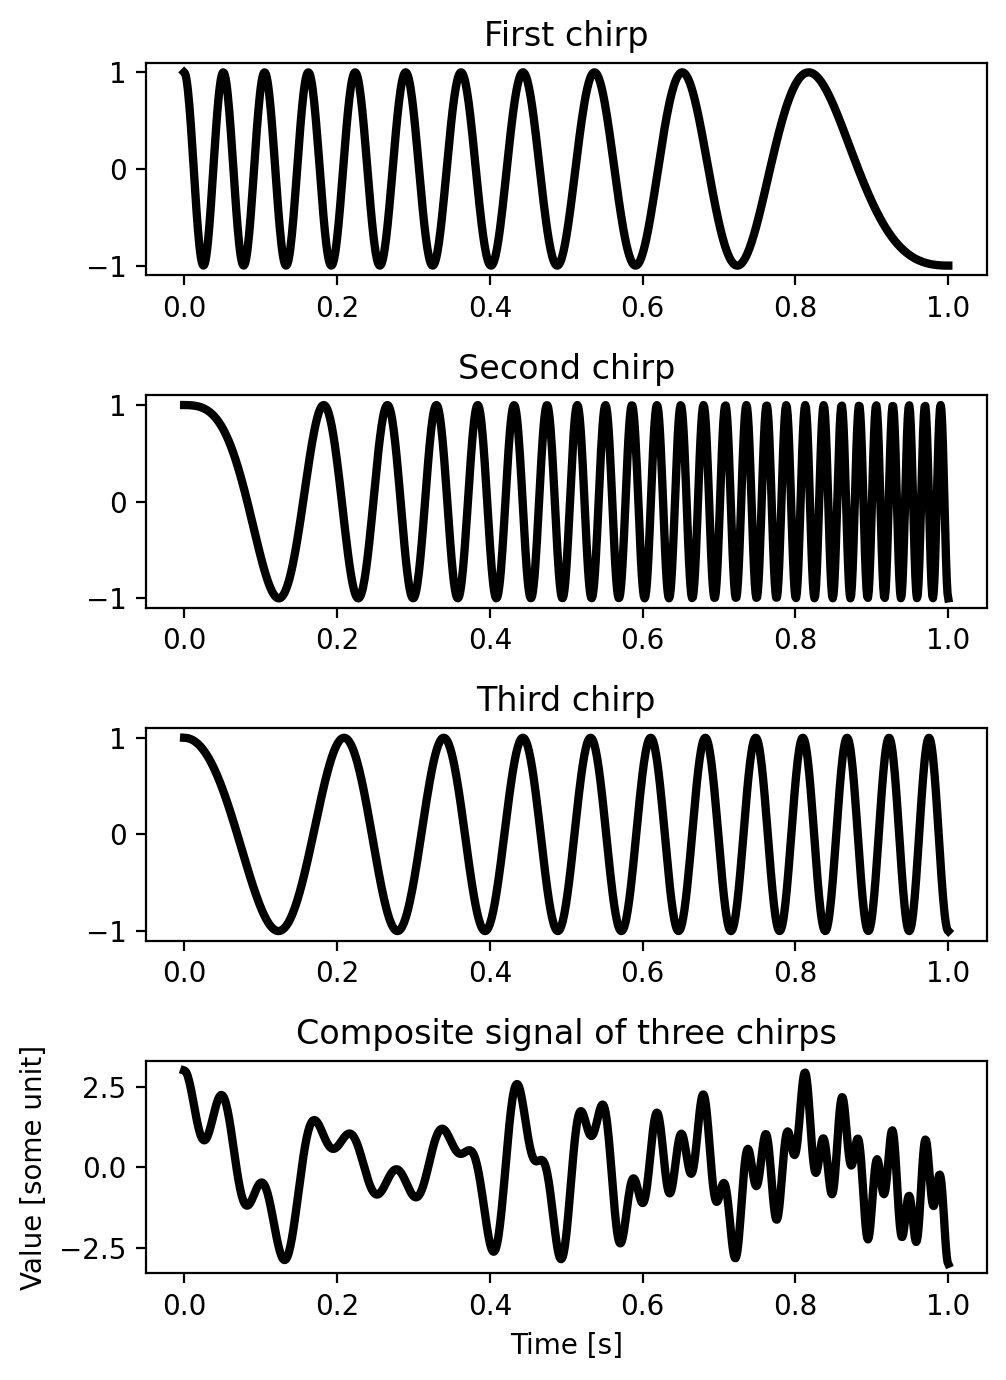

In [54]:
t = np.linspace(0, 1, 1000)

w1 = chirp(t, f0=20, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=50, t1=1)
w3 = chirp(t, f0=3, f1=20, t1=1)

plt.figure(figsize=(5, 7), dpi=200)

plt.subplot(411)
plt.plot(t, w1,  linewidth=3, color="k")

plt.title('First chirp')

plt.subplot(412)
plt.plot(t, w2,  linewidth=3, color="k")

plt.title('Second chirp')

plt.subplot(413)
plt.plot(t, w3,  linewidth=3, color="k")

plt.title('Third chirp')

plt.subplot(414)
plt.plot(t, w1+w2+w3, linewidth=3, color="k")

plt.title('Composite signal of three chirps')

plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')

plt.tight_layout()

plt.savefig("fig1.png", bbox_inches="tight")

---